# A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/)

## Do your importing and your setup

In [255]:
import pandas as pd
%matplotlib inline

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [256]:
df = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx", nrows=3000)
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [257]:
df.shape

(81937, 15)

In [258]:
df = df.head(3000)

In [259]:
df.shape

(3000, 15)

In [260]:
df.dtypes

Owner Zip Code                     int64
Animal Name                       object
Animal Gender                     object
Primary Breed                     object
Secondary Breed                   object
Animal Dominant Color             object
Animal Secondary Color            object
Animal Third Color                object
Animal Birth              datetime64[ns]
Spayed or Neut                    object
Guard or Trained                  object
Vaccinated                        object
Application Date          datetime64[ns]
License Issued Date       datetime64[ns]
License Expired Date      datetime64[ns]
dtype: object

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

In [261]:
#Each row represents a quality or feature regarded as a characteristic or inherent part of an animal.

#COLUMNS:

#1. Animal Gender is whether the animal is female or male. 
#2. Vaccinated is whether the animal is vaccinated or not.

# Your thoughts

Think of four questions you could ask this dataset. **Don't ask them**, just write them down in the cell below.

In [262]:
#1. What are the top 10 breeds in the dataset?
#2. How many male animals are there compared to the number of female animals? 
#3. Where are the most owners based? Does this city have more male or female animals?
#4. Which is the most common secondary color of the animals?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

In [263]:
df["Primary Breed"].value_counts()

Unknown                                 416
Yorkshire Terrier                       160
Chihuahua                               147
Shih Tzu                                140
Maltese                                 122
Labrador Retriever                      117
Labrador Retriever Crossbreed            85
American Pit Bull Terrier/Pit Bull       84
American Pit Bull Mix / Pit Bull Mix     81
Beagle                                   74
Poodle, Miniature                        58
Jack Russell Terrier                     52
Golden Retriever                         50
Cocker Spaniel                           49
Havanese                                 48
Cavalier King Charles Spaniel            48
Bull Dog, French                         42
Pomeranian                               40
German Shepherd Crossbreed               38
Pug                                      37
Boston Terrier                           36
Schnauzer, Miniature                     35
Beagle Crossbreed               

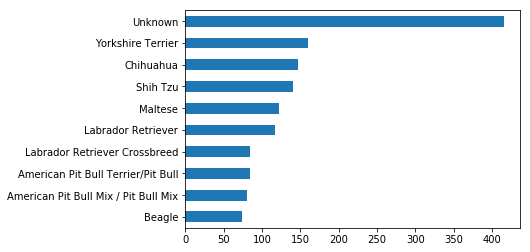

In [264]:
df["Primary Breed"].value_counts().head(10).sort_values().plot(kind='barh')

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

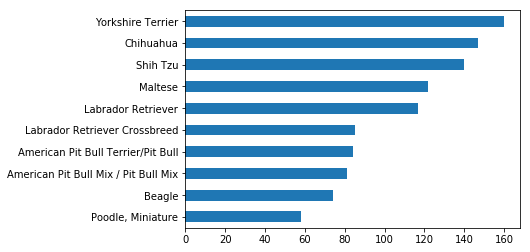

In [265]:
df[df['Primary Breed'] != 'Unknown']['Primary Breed'].value_counts().head(10).sort_values().plot(kind='barh')

## What are the most popular dog names?

In [266]:
df["Animal Name"].value_counts()

Bella                          25
Max                            19
Lola                           19
Charlie                        19
Lily                           15
Daisy                          14
Buddy                          13
Lucy                           13
Rocky                          13
Coco                           13
Luna                           12
Oliver                         11
Sasha                          10
Toby                           10
Rosie                           9
Stella                          9
Sophie                          9
Buster                          9
Zoey                            9
Harley                          8
Bruno                           8
Blue                            8
Ruby                            8
Baxter                          8
Chloe                           8
Sammy                           8
Zoe                             8
Riley                           8
Tucker                          7
Cody          

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [267]:
Sotiris = df[df['Animal Name'].str.upper() == 'SOTIRIS']
Sotiris['Animal Name'].str.upper().value_counts()

Series([], Name: Animal Name, dtype: int64)

In [268]:
Max = df[df['Animal Name'].str.upper() == 'MAX']
Max['Animal Name'].str.upper().value_counts()

MAX    23
Name: Animal Name, dtype: int64

In [269]:
Maxwell = df[df['Animal Name'].str.upper() == 'MAXWELL']
Maxwell['Animal Name'].str.upper().value_counts()

MAXWELL    1
Name: Animal Name, dtype: int64

## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [270]:
df["Guard or Trained"].value_counts(normalize=True) * 100

No     99.824766
Yes     0.175234
Name: Guard or Trained, dtype: float64

## What are the actual numbers?

In [271]:
df["Guard or Trained"].describe()

count     1712
unique       2
top         No
freq      1709
Name: Guard or Trained, dtype: object

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [272]:
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


In [273]:
df['Guard or Trained'].value_counts(dropna=False)

No     1709
NaN    1288
Yes       3
Name: Guard or Trained, dtype: int64

## Fill in all of those empty "Guard or Trained" columns with "No"

Then check your result with another `.value_counts()`

In [274]:
df[df['Guard or Trained'].isnull()]

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12
5,10013,Queen,F,Akita Crossbreed,NaN,Charcoal,Red,NaN,2013-04-01,No,NaN,Yes,2014-09-12 16:14:48.487,2014-09-12,2017-09-12
6,10035,Paige Sable Orta,F,American Pit Bull Mix / Pit Bull Mix,NaN,White,Gray,NaN,2014-07-01,No,NaN,No,2014-09-12 16:22:54.113,2014-09-12,2017-09-12
11,11232,muneca,F,Beagle,NaN,White,Black,Brown,2013-05-01,Yes,NaN,Yes,2014-09-13 00:58:36.603,2014-09-13,2019-09-13
12,10022,Elizabeth,F,Cavalier King Charles Spaniel,NaN,Brown,White,NaN,2013-03-01,Yes,NaN,Yes,2014-09-13 07:07:54.303,2014-09-13,2019-09-13
14,10025,Dottie,F,"Poodle, Standard",NaN,Cream,NaN,NaN,2013-04-01,Yes,NaN,Yes,2014-09-13 11:28:32.237,2014-09-13,2017-09-13
15,11215,Lucy Moo Jung,F,Dachshund Smooth Coat Miniature,NaN,White,Black,NaN,2014-03-01,Yes,NaN,Yes,2014-09-13 13:40:23.943,2014-09-13,2019-09-13
18,11220,Ricky,M,German Shepherd Dog,NaN,Black,Tan,NaN,2014-07-01,No,NaN,No,2014-09-13 15:40:08.160,2014-09-13,2017-09-13
19,10002,Avery,F,American Pit Bull Terrier/Pit Bull,NaN,Gray,NaN,NaN,2014-06-01,No,NaN,No,2014-09-13 15:55:11.457,2014-09-13,2019-09-13


In [275]:
df['Guard or Trained'].fillna("No", inplace=True)
df['Guard or Trained'].value_counts(dropna=False)

No     2997
Yes       3
Name: Guard or Trained, dtype: int64

## What are the top dog breeds for guard dogs? 

In [276]:
df[df['Guard or Trained'] == 'Yes'].sort_values(by='Primary Breed')

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
2702,10014,Bojangles Swagu Rosenberg,M,"Poodle, Standard",NaN,Apricot,Blond,Tan,2014-03-01,Yes,Yes,Yes,2015-03-23 18:42:30.120,2015-03-23,2020-05-15
2363,10014,Truman,M,Unknown,Chinese Crested/terrier,WHITE,BLACK,GRAY,2010-12-01,Yes,Yes,Yes,2015-03-05 01:31:07.200,2015-03-05,2019-02-16
2871,11361,Dorofey,M,Unknown,black russian terrier,BLACK,NaN,NaN,2010-01-01,No,Yes,Yes,2015-03-27 12:17:32.927,2015-03-27,2016-05-08


## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [277]:
df['year'] = df['Animal Birth'].apply(lambda birth: birth.year)
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [278]:
df['year'].astype(int)
df['age'] = 2017 - df['year']
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,10
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,4
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,3
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,9
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,3


In [279]:
df['age'].mean()

7.3289999999999997

# Joining data together

In [280]:
df_hoodz = pd.read_csv("zipcodes-neighborhoods.csv")
df_hoodz.head()

,neighborhood,zip,borough
0,Central Bronx,10453,Bronx
1,Central Bronx,10457,Bronx
2,Central Bronx,10460,Bronx
3,Bronx Park and Fordham,10458,Bronx
4,Bronx Park and Fordham,10467,Bronx


## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

In [281]:
combined_df = df.merge(df_hoodz, left_on="Owner Zip Code", right_on="zip")
combined_df

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age,neighborhood,zip,borough
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,10,Upper West Side,10024,Manhattan
1,10024,Louie,M,Unknown,Coonhound,Black,White,Brown,2008-05-01,Yes,No,Yes,2014-09-15 16:36:20.200,2014-09-15,2017-09-03,2008,9,Upper West Side,10024,Manhattan
2,10024,Tosha,F,"Collie, Smooth Coat",NaN,BLUE MERLE,WHITE,TAN,2011-12-01,Yes,No,Yes,2014-09-16 10:22:07.867,2014-09-16,2017-10-11,2011,6,Upper West Side,10024,Manhattan
3,10024,Poppett,F,"Dachshund, Long Haired Miniature",NaN,Black,Brown,Silver,2011-02-01,Yes,No,Yes,2014-09-18 16:25:57.323,2014-09-18,2019-09-18,2011,6,Upper West Side,10024,Manhattan
4,10024,Harlen,M,Unknown,Plott Hound,BLACK,TAN,BROWN,2007-05-01,Yes,No,Yes,2014-09-25 17:11:20.713,2014-09-25,2016-08-20,2007,10,Upper West Side,10024,Manhattan
5,10024,Barney,M,Beagle,NaN,BROWN,WHITE,ORANGE,2004-06-01,Yes,No,Yes,2014-09-29 15:58:56.570,2014-09-29,2016-10-01,2004,13,Upper West Side,10024,Manhattan
6,10024,Peyton,M,Unknown,Black Mouth Cur,BRINDLE,BLACK,NaN,2012-08-01,Yes,No,Yes,2014-10-02 11:23:37.220,2014-10-02,2016-09-24,2012,5,Upper West Side,10024,Manhattan
7,10024,Phoebe,F,Cavalier King Charles Spaniel,NaN,GOLD,APRICOT,WHITE,2009-01-01,Yes,No,Yes,2014-10-06 15:13:32.223,2014-10-06,2016-10-25,2009,8,Upper West Side,10024,Manhattan
8,10024,Baci,F,Dachshund,NaN,Black,Tan,NaN,2013-02-01,Yes,No,Yes,2014-10-06 20:05:14.213,2014-10-06,2016-10-06,2013,4,Upper West Side,10024,Manhattan
9,10024,Delilah Eddy,F,German Shepherd Crossbreed,NaN,BLACK,TAN,NaN,2007-05-01,Yes,No,Yes,2014-10-09 13:55:43.907,2014-10-09,2019-10-11,2007,10,Upper West Side,10024,Manhattan


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [282]:
Bronx = combined_df[combined_df['borough'] == 'Bronx']
Bronx['Animal Name'].value_counts().head(1)

Bella    4
Name: Animal Name, dtype: int64

In [283]:
Brooklyn = combined_df[combined_df['borough'] == 'Brooklyn']
Brooklyn['Animal Name'].value_counts().head(1)

Bella    7
Name: Animal Name, dtype: int64

In [284]:
Upper_East_Side = combined_df[combined_df['neighborhood'] == 'Upper East Side']
Upper_East_Side['Animal Name'].value_counts().head(1)

Charlie    4
Name: Animal Name, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

In [301]:
#combined_df.groupby("neighborhood")["Primary Breed"].max().dropna()
combined_df['Primary Breed'] = combined_df['Primary Breed'].str.replace('Unknown', '').groupby(level=0)
combined_df.groupby("neighborhood")["Primary Breed"].max().dropna()

neighborhood
Borough Park                                                (2832, [Chihuahua])
Bronx Park and Fordham                                       (2868, [Shih Tzu])
Bushwick and Williamsburg                         (2160, [American Eskimo dog])
Canarsie and Flatlands                              (2739, [Yorkshire Terrier])
Central Bronx                                                (2920, [Shih Tzu])
Central Brooklyn                                            (2860, [Chihuahua])
Central Harlem                                         (2948, [Cocker Spaniel])
Central Queens                          (2914, [Labrador Retriever Crossbreed])
Chelsea and Clinton                                         (2822, [Dachshund])
East Harlem                                      (1217, [Jack Russell Terrier])
East New York and New Lots       (2911, [American Pit Bull Mix / Pit Bull Mix])
Flatbush                                            (2951, [Yorkshire Terrier])
Gramercy Park and Murray Hi

## What breed of dogs are the least likely to be spayed? Male or female?

In [286]:
combined_df['Primary Breed'].value_counts()

                                        411
Yorkshire Terrier                       159
Chihuahua                               147
Shih Tzu                                137
Maltese                                 122
Labrador Retriever                      116
Labrador Retriever Crossbreed            84
American Pit Bull Terrier/Pit Bull       83
American Pit Bull Mix / Pit Bull Mix     77
Beagle                                   74
Poodle, Miniature                        57
Jack Russell Terrier                     52
Golden Retriever                         50
Cavalier King Charles Spaniel            48
Cocker Spaniel                           47
Havanese                                 45
Bull Dog, French                         41
Pomeranian                               39
German Shepherd Crossbreed               38
Pug                                      37
Boston Terrier                           36
Schnauzer, Miniature                     35
Beagle Crossbreed               

In [287]:
not_fixed = combined_df[combined_df['Spayed or Neut'] == 'No']
combined_df.dropna(subset=['Spayed or Neut'], inplace=True)
total = not_fixed['Primary Breed'].value_counts() / combined_df['Primary Breed'].value_counts()
total.sort_values().dropna()

Labrador Retriever Crossbreed           0.011905
Jack Russell Terrier                    0.019231
Havanese                                0.022222
Bull Dog, French                        0.024390
Pomeranian                              0.025641
German Shepherd Crossbreed              0.026316
Beagle Crossbreed                       0.029412
                                        0.031630
Labradoodle                             0.033333
Beagle                                  0.040541
Boxer                                   0.043478
American Pit Bull Mix / Pit Bull Mix    0.051948
Poodle, Miniature                       0.052632
Pug                                     0.054054
Schnauzer, Miniature                    0.057143
Maltese                                 0.057377
Labrador Retriever                      0.060345
Shiba Inu                               0.060606
Chihuahua                               0.061224
American Staffordshire Terrier          0.062500
Cocker Spaniel      

## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

In [330]:
colors = ['black', 'BLACK', 'white', 'WHITE', 'grey', 'GREY']

color = combined_df[combined_df['Animal Dominant Color'].isin(colors)]
monochrome = color[color['Animal Secondary Color'].isnull()]

In [331]:
monochrome.shape

(172, 20)

## How many dogs are in each borough? Plot it in a graph.

In [288]:
combined_df['borough'].value_counts()

Manhattan        1316
Brooklyn          773
Queens            452
Bronx             240
Staten Island     173
Name: borough, dtype: int64

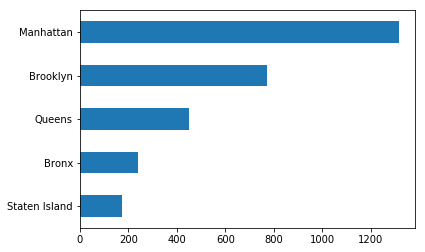

In [289]:
combined_df['borough'].value_counts().sort_values().plot(kind='barh')

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [290]:
df_boro = pd.read_csv("boro_population.csv")

In [291]:
cocombined_df = combined_df.merge(df_boro, left_on="borough", right_on="borough")
cocombined_df

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,...,Application Date,License Issued Date,License Expired Date,year,age,neighborhood,zip,borough,population,area_sqmi
0,10024,BLUE MACK,M,,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,...,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,10,Upper West Side,10024,Manhattan,1644518,23
1,10024,Louie,M,,Coonhound,Black,White,Brown,2008-05-01,Yes,...,2014-09-15 16:36:20.200,2014-09-15,2017-09-03,2008,9,Upper West Side,10024,Manhattan,1644518,23
2,10024,Tosha,F,"Collie, Smooth Coat",NaN,BLUE MERLE,WHITE,TAN,2011-12-01,Yes,...,2014-09-16 10:22:07.867,2014-09-16,2017-10-11,2011,6,Upper West Side,10024,Manhattan,1644518,23
3,10024,Poppett,F,"Dachshund, Long Haired Miniature",NaN,Black,Brown,Silver,2011-02-01,Yes,...,2014-09-18 16:25:57.323,2014-09-18,2019-09-18,2011,6,Upper West Side,10024,Manhattan,1644518,23
4,10024,Harlen,M,,Plott Hound,BLACK,TAN,BROWN,2007-05-01,Yes,...,2014-09-25 17:11:20.713,2014-09-25,2016-08-20,2007,10,Upper West Side,10024,Manhattan,1644518,23
5,10024,Barney,M,Beagle,NaN,BROWN,WHITE,ORANGE,2004-06-01,Yes,...,2014-09-29 15:58:56.570,2014-09-29,2016-10-01,2004,13,Upper West Side,10024,Manhattan,1644518,23
6,10024,Peyton,M,,Black Mouth Cur,BRINDLE,BLACK,NaN,2012-08-01,Yes,...,2014-10-02 11:23:37.220,2014-10-02,2016-09-24,2012,5,Upper West Side,10024,Manhattan,1644518,23
7,10024,Phoebe,F,Cavalier King Charles Spaniel,NaN,GOLD,APRICOT,WHITE,2009-01-01,Yes,...,2014-10-06 15:13:32.223,2014-10-06,2016-10-25,2009,8,Upper West Side,10024,Manhattan,1644518,23
8,10024,Baci,F,Dachshund,NaN,Black,Tan,NaN,2013-02-01,Yes,...,2014-10-06 20:05:14.213,2014-10-06,2016-10-06,2013,4,Upper West Side,10024,Manhattan,1644518,23
9,10024,Delilah Eddy,F,German Shepherd Crossbreed,NaN,BLACK,TAN,NaN,2007-05-01,Yes,...,2014-10-09 13:55:43.907,2014-10-09,2019-10-11,2007,10,Upper West Side,10024,Manhattan,1644518,23


In [292]:
num_of_dogs = cocombined_df['borough'].value_counts()
num_of_dogs

Manhattan        1316
Brooklyn          773
Queens            452
Bronx             240
Staten Island     173
Name: borough, dtype: int64

In [293]:
df_boro

,borough,population,area_sqmi
0,Manhattan,1644518,23
1,Bronx,1455444,42
2,Brooklyn,2636735,71
3,Queens,2339150,109
4,Staten Island,474558,59


In [294]:
#ManhattanDPC
1316 / 1644518

0.0008002344759984384

In [295]:
#BrooklynDPC
773 / 2636735

0.00029316560063866865

In [296]:
#QueensDPC   
452 / 2339150

0.0001932325844858175

In [297]:
#BronxDPC
240 / 1455444

0.00016489813417761178

In [298]:
#StatenIslandDPC
173 / 474558

0.00036454974945106814

## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? You really should ask me, because it's kind of crazy.

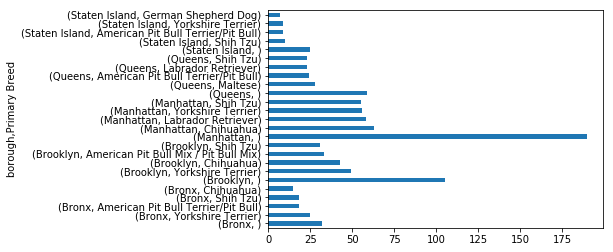

In [336]:
df_top_breeds = cocombined_df.groupby('borough')['Primary Breed'].value_counts().groupby('borough').head(5).plot(kind='barh')

## What percentage of dogs are not guard dogs?

In [300]:
cocombined_df['Guard or Trained'].value_counts(normalize=True) * 100

No     99.898443
Yes     0.101557
Name: Guard or Trained, dtype: float64